# Project Pipeline

- Import Necessary Dependencies
- Read and Load the Dataset
- Exploratory Data Analysis
- Data Visualization of Tagret Variables
- Data Preprocessing
- Splitting our Data into Train and Test Subset
- Transforming Dataset using TF-IDF Vectorizer
- Function for Model Evaluation
- Model Building
- Conclusion 

# Import Necessary Dependencies

## Step-1: Import Necessary Dependencies

In [1]:
#utilities
import re
import numpy as np
import pandas as pd

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
#nltk
from nltk.stem import WordNetLemmatizer
#sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report
#warnings
import warnings
warnings.filterwarnings('ignore')

## Step-2: Read and load the dataset

In [2]:
df = pd.read_csv('Downloads/Sentiment140.csv',encoding='ISO-8859-1',names=['target','ids','date','flag','user','text'])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Step-3: Exploratory Data Analysis

### 3.1: Top 5 records of the data

In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### 3.2: Columns/features in data

In [4]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

### 3.3: Length of the dataset

In [5]:
len(df)

1600000

### 3.4: Shape of the data

In [6]:
df.shape

(1600000, 6)

### 3.5: Data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### 3.6: Datatypes of all columns 

In [8]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

### 3.7: Checking for null values

In [9]:
np.sum(df.isnull())

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

### 3.8: Rows and Columns in the dataset

In [10]:
print('Count of columns in the data:',df.shape[1])
print('Count of rows in the data:',df.shape[0])

Count of columns in the data: 6
Count of rows in the data: 1600000


### 3.9: Check unique Target values

In [11]:
df['target'].unique()

array([0, 4], dtype=int64)

### 3.10: Checking number of target values with their count

In [12]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

## Step-4: Data Visualization of Target Variables

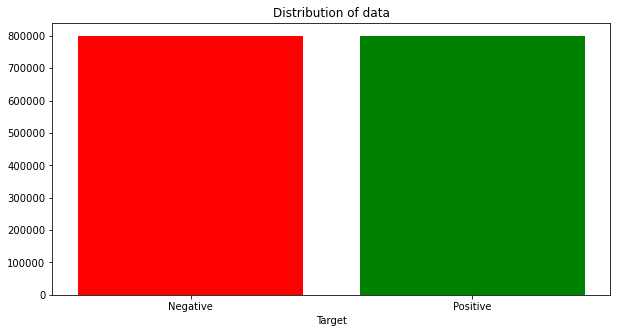

In [13]:
#Plotting the distribution for dataset
plt.figure(figsize=(10,5))
plt.bar(list(['Negative','Positive']),list(df['target'].value_counts()),color=['red','green'])
plt.title('Distribution of data')
plt.xlabel('Target')
plt.show()

In [14]:
#Storing data in lists
text, sentiment = list(df['text']),list(df['target'])

In [15]:
df['user'].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: user, Length: 659775, dtype: int64

[]

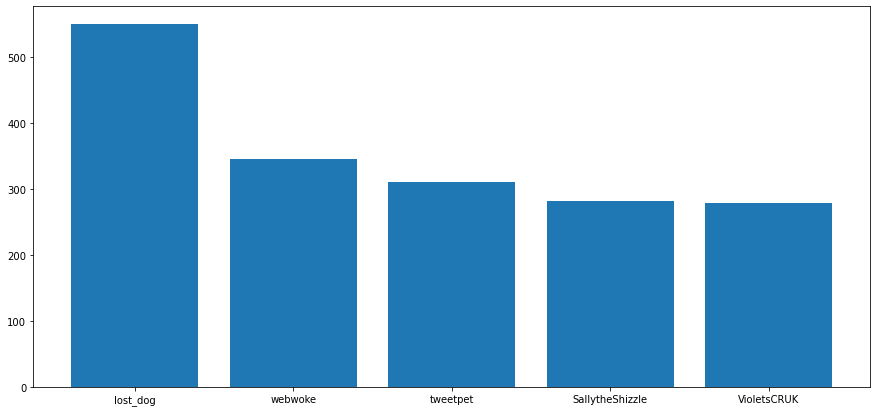

In [16]:
#Top 5 users with their number of tweets
plt.figure(figsize=(15,7))
plt.bar(list(df['user'].value_counts().keys()[0:5]),list(df['user'].value_counts()[0:5]))
plt.plot()

## Step-5: Data Preprocessing

### 5.1: Selecting text and target column for further analysis

In [17]:
data = df[['text','target']]

### 5.2: Replacing values to ease understanding

In [18]:
data['target'] = data['target'].replace(4,1)

### 5.3: Print Unique values of target variables

In [19]:
data['target'].unique()

array([0, 1], dtype=int64)

### 5.4: Separating positive and negative tweets

In [20]:
data_pos = data[data['target']==1]
data_neg = data[data['target']==0]

### 5.5: Limiting or Dataset

In [21]:
data_pos = data_pos.iloc[:20000]
data_neg = data_neg.iloc[:20000]

### 5.6: Combining positive and negative tweets

In [22]:
dataset = pd.concat([data_pos,data_neg])

### 5.7: Making statement text in lower case

In [23]:
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

### 5.8: Defining set containing all stopwords in English

In [24]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves']

### 5.9: Cleaning and removing the above stopwords list from the text tweet

In [25]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

### 5.10: Cleaning and removing punctuations

In [26]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

### 5.11: Cleaning and removing repeated characters

In [27]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

### 5.12: Cleaning and removing URL's

In [28]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

### 5.13: Cleaning and removing numeric data

In [29]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
Name: text, dtype: object

### 5.14: Getting tokenization of tweet text

In [30]:
from nltk.tokenize import word_tokenize
def token(data):
    return word_tokenize(data)
dataset['text'] = dataset['text'].apply(lambda x: token(x))

In [31]:
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

### 5.15: Applying Stemming

In [32]:
from nltk import PorterStemmer
ps = PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(text) for text in tokenized_text]
    return text
dataset['text'] = dataset['text'].apply(lambda x:stemming(x))
dataset['text'].head()

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

### 5.16: Applying Lemmatizer

In [33]:
from nltk import WordNetLemmatizer
wn = WordNetLemmatizer()
def lemmatizing(stemmed_text):
    text = [wn.lemmatize(text) for text in stemmed_text]
    return text
dataset['text'] = dataset['text'].apply(lambda x:lemmatizing(x))
dataset['text'].head()

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

### 5.17: Separating input feature label

In [34]:
x = data.text
y = data.target

In [35]:
data_neg = data['text'][:800000]

In [36]:
data_neg

0         @switchfoot http://twitpic.com/2y1zl - Awww, t...
1         is upset that he can't update his Facebook by ...
2         @Kenichan I dived many times for the ball. Man...
3           my whole body feels itchy and like its on fire 
4         @nationwideclass no, it's not behaving at all....
                                ...                        
799995    Sick  Spending my day laying in bed listening ...
799996                                      Gmail is down? 
799997                        rest in peace Farrah! So sad 
799998    @Eric_Urbane Sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: text, Length: 800000, dtype: object

In [40]:
arg = int(input("Enter the tweet number you want to analyze:"))

Enter the tweet number you want to analyze:36


In [41]:
neg_tweet = data_neg.tolist()[arg]

['cocomix', 'ill', 'tell', 'ya', 'story', 'later', 'not', 'good', 'day', 'ill', 'workin', 'like', 'three', 'hours']


[]

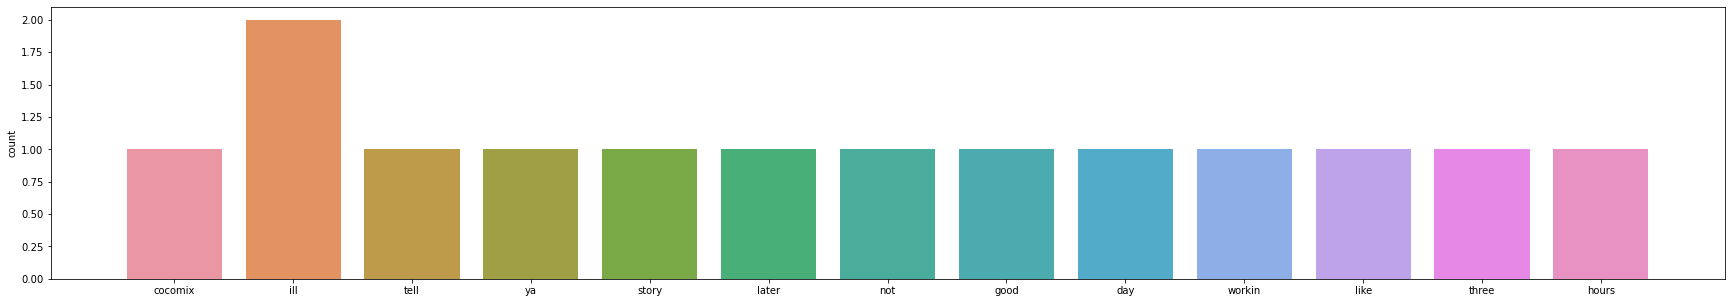

In [42]:
neg_lst = [] 
neg_tweet = cleaning_stopwords(neg_tweet)
neg_tweet = cleaning_punctuations(neg_tweet)
neg_tweet = cleaning_URLs(neg_tweet)
neg_tweet = cleaning_numbers(neg_tweet)
x1 = neg_tweet.split(' ')
neg_lst.extend(x1)
print(neg_lst)
plt.figure(figsize=(30,5))
sns.countplot(x=neg_lst)
plt.plot()

In [43]:
data_pos = data['text'][80000:]

In [44]:
data_pos

80000      Cannot actually keep my eyes open.., I feel li...
80001      Home from the show left after Ryan's set... I ...
80002      @UncleRUSH sickness, it's bad... Good Luck tho...
80003      @jupaman Damn Pablo sorry to hear your trouble...
80004      no in two weeks if the meds dont work ill have...
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1520000, dtype: object

In [45]:
arg = int(input("Enter the tweet number you want to analyze:"))
pos_tweet = data_pos.tolist()[arg]

Enter the tweet number you want to analyze:18


['I', 'wanna', 'watch', 'BOF', 'Currently', 'eating', '', 'Hjh', 'Maimunah', 'Oh', 'I', 'havent', 'studied', 'thing', 'Bio', 'tomorrow']


[]

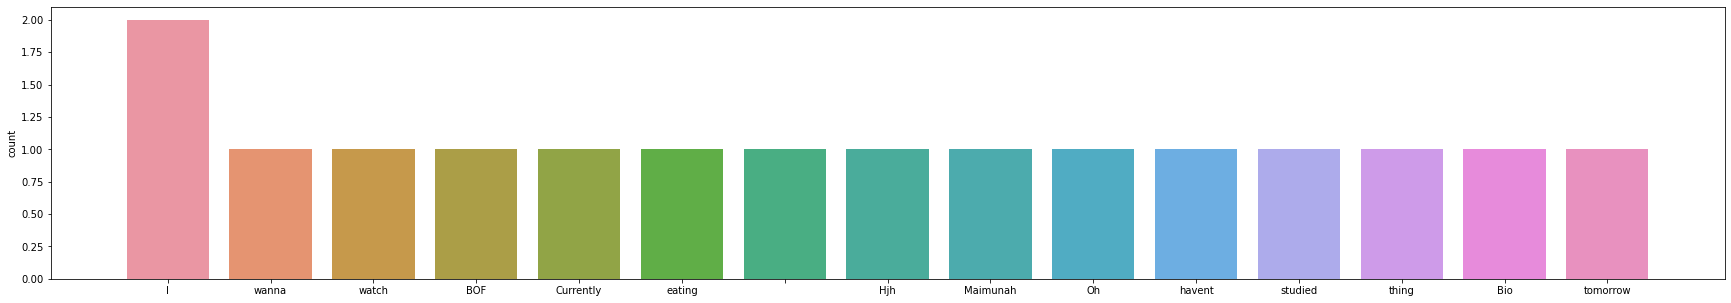

In [46]:
pos_lst = [] 
pos_tweet = cleaning_stopwords(pos_tweet)
pos_tweet = cleaning_punctuations(pos_tweet)
pos_tweet = cleaning_URLs(pos_tweet)
pos_tweet = cleaning_numbers(pos_tweet)
x2 = pos_tweet.split(' ')
pos_lst.extend(x2)
print(pos_lst)
plt.figure(figsize=(30,5))
sns.countplot(x=pos_lst)
plt.plot()

## Step-6: Splitting our data into train and test subset

In [47]:
# Separating the 95% data for training data and 5% for testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state =26105111)

## Step-7: Transforming Dataset using TF-IDF Vectorizer

### 7.1: Fit the TF-IDF Vectorizer

In [48]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


### 7.2: Transform the data using TF-IDF Vectorizer 

In [49]:
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

## Step-8: Function for model evaluation 

- Accuracy Score
- Confusion Matrix with Plot
- ROC-AUC Curve

In [50]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(x_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Step-9: Model building

#### In the problem statement we have used three different models respectively :

- Bernoulli Naive Bayes
- SVM (Support Vector Machine)
- Logistic Regression

### 8.1: Model-1

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



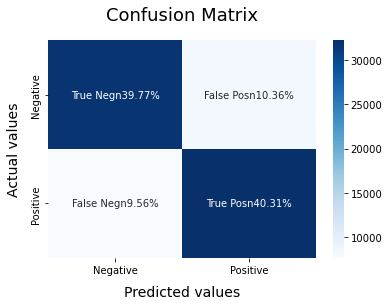

In [51]:
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(x_test)

### 8.2: Plot the ROC-AUC Curve for model-1 

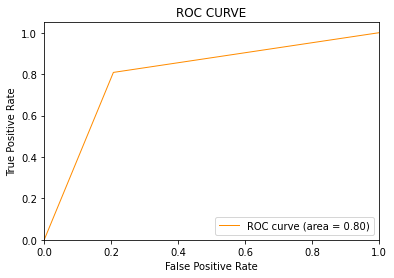

In [52]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### 8.3: Model-2 

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



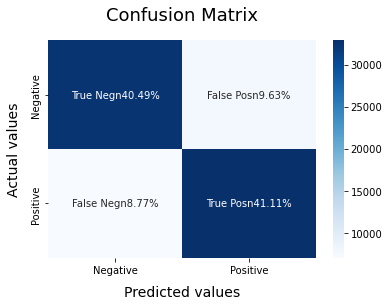

In [53]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(x_test)

### 8.4: Plot the ROC-AUC Curve for model-2

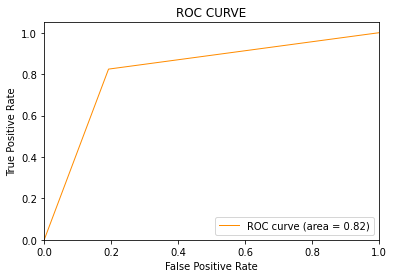

In [54]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### 8.5: Model-3

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     40100
           1       0.82      0.83      0.83     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



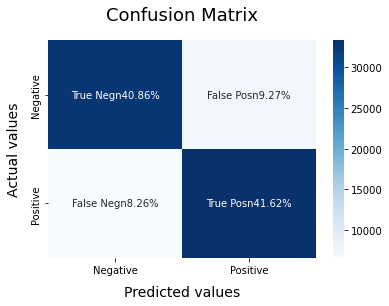

In [55]:
LRmodel = LogisticRegression()
LRmodel.fit(x_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(x_test)

### 8.6: Plot the ROC-AUC Curve for model-3

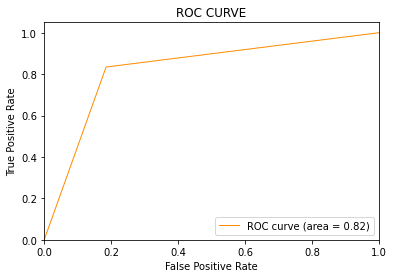

In [56]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## Step-10: Conclusion 

#### Upon evaluating all the models we can conclude the following details i.e.
- Accuracy: As far as the accuracy of the model is concerned Logistic Regression and SVM performs better than Bernoulli Naive Bayes
- F1-score: The F1-scores of class 1 and class 0 are:
  - (a): For class 0: Bernoulli Naive Bayes(accuracy = 0.80) < SVM (accuracy =0.81) < Logistic Regression (accuracy = 0.82)
  - (b): For class 1: Bernoulli Naive Bayes (accuracy = 0.80) < SVM (accuracy = 0.82) < Logistic Regression (accuracy = 0.83)
- AUC score: Bernoulli Naive Bayes (area = 0.80) < SVM (area = 0.82) = Logistic Regression (area = 0.82)

- We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.
- In our problem statement, Logistic Regression is following the principle of Occam’s Razor which defines that for a particular problem statement if the data has no assumption, then the simplest model works the best. Since our dataset does not have any assumptions and Logistic Regression is a simple model, therefore the concept holds true for the above-mentioned dataset.